- Whenever the data is collected, it is not always collected in a very clean manner. Sometimes there will be human errors, duplicate data present in multiple features, correlated features etc. Hence feature selection plays a important role as not all the features are important. We have to select the important features.

## What is the purpose of Feature Selection?
- Many learning algorithms perform poorly on high-dimensional data. This is known as the __Curse of Dimensionality__.
- There are other reasons we may wish to reduce the number of features including:  
1. Reducing computational cost  
2. Reducing the cost associated with data collection  
3. Improving Interpretability (having just few feaures makes more sense than couple of different features)

In [1]:
import pandas as pd
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


- Here the dependent feature is 'price_range'.

In [2]:
df.shape

(2000, 21)

## 1. Univariate Selection

In [3]:
x = df.iloc[:, :-1]
y = df['price_range']

In [4]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [5]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest
#SelectKBest is used to select K best features
from sklearn.feature_selection import chi2
#chi-square is used for applying statistical analysis (hypothesis , null-hypothesis , alternate hypothesis testing)

In [7]:
#Apply SelectKBest algorithm
ordered_rank_features = SelectKBest(score_func = chi2, k = 20)
ordered_feature = ordered_rank_features.fit(x,y)

In [8]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000001FC094B7DC0>)

In [9]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [10]:
#creating a dataframe storing the ordered features
df_scores = pd.DataFrame(ordered_feature.scores_, columns = ['Score'])
df_scores

,Score
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [11]:
df_columns = pd.DataFrame(x.columns)
df_columns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [12]:
#concatenating both the data frames and forming a new dataframe
features_rank = pd.concat([df_columns, df_scores], axis = 1)
features_rank

,0,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [13]:
#renaming columns of the dataframe
features_rank.columns = ['Features', 'Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [14]:
#selecting the top features w.r.t score
features_rank.nlargest(10, 'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [15]:
#sorting the order by the score in decreasing order
features_rank.sort_values(by = 'Score', ascending = False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


- Higher the value of the score, higher the value of that feature.
- The features with very low score will be removed.

## 2. Feature Importance
- This technique gives you a score for each feature of your data. Higher the score, more relevant the feature is.

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x, y)

ExtraTreesClassifier()

In [17]:
print(model.feature_importances_)

[0.06068183 0.020057   0.0346916  0.01855732 0.03269166 0.01778475
 0.03586009 0.03509911 0.03708093 0.03437694 0.03509934 0.0480778
 0.04843312 0.38606605 0.03451364 0.03437317 0.03458559 0.01464153
 0.01714936 0.02017917]


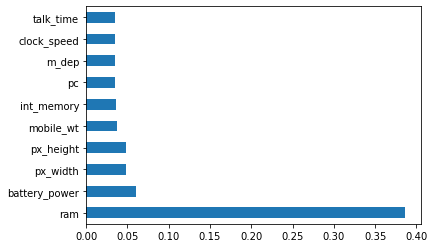

In [18]:
ranked_features = pd.Series(model.feature_importances_, index = x.columns)
ranked_features.nlargest(10).plot(kind = 'barh')
plt.show()

## 3. Correlation
- If your independent feature values are increasing along with your dependent feature values, we call it as Positive Correlation.
- If your independent feature values are decreasing along with your dependent feature values, we call it as Negative Correlation.
- If your independent feature values are increasing and your dependent feature values are decreasing or vice-versa, we call it there is no Correlation.

In [70]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
#loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target

In [72]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### If an independent feature is highly correlated with dependent feature we need not remove those kind of features because those features can play a very important role when we train our machine learning model. But if we have independent features lets say 3 independent features, and they are highly correlated with each other i.e. more than 90% then from these 3 we will use only 1 feature. Because these 3 will behave like duplicate features. In case of duplicate features we need not take all the features, we take either one of those features. This way we can remove features.

In [74]:
#independent and dependent features (Feature Matrix)
x = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [75]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
#separate dataset into train and test set (to prevent the overfitting)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape

((354, 13), (152, 13))

#### All the functionalities that we will apply w.r.t correlation on the training dataset, will do the similar things on the test dataset as well. Suppose in the training dataset we have 4 features which are higly correlated, then we will remove 3 features directly from the training dataset and we will not the correlation retest again on the test dataset. We will also remove those features from testing dataset.

In [77]:
#correlation between all the independent features
x_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


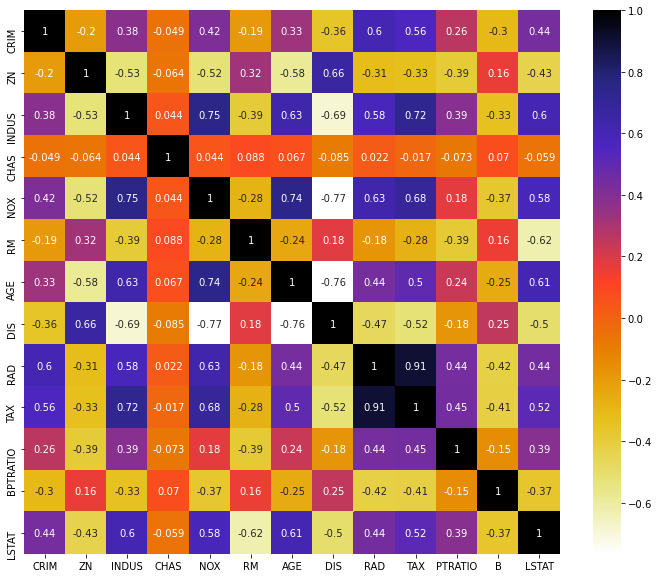

In [78]:
#Visualizing the correlation between the features

import seaborn as sns
#using Pearson Correlation
plt.figure(figsize = (12, 10))
cor = x_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [79]:
#crating a function through which we can select highly correlated features
#it will remove the first feature that is correlated with another feature
def correlation(dataset, threshold):
    col_corr = set()  #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #we are interested in absolute coefficient value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]    #getting the name of the column
                col_corr.add(colname)
    return col_corr

- In general people use 85% as threshold.

In [80]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

1

In [81]:
corr_features

{'TAX'}

In [82]:
#dropping the feature from the training as well as testing dataset
x_train.drop(corr_features, axis = 1)
x_test.drop(corr_features, axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,18.4,396.90,4.54


### Using the technique on bigger dataset

In [83]:
df = pd.read_csv('santander_train.csv', nrows = 10000)
x = df.drop(labels = ['TARGET'], axis = 1)
y = df['TARGET']
#separate dataset into train test
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels = ['TARGET'], axis = 1),
                                                    df['TARGET'], test_size = 0.3, random_state = 0)

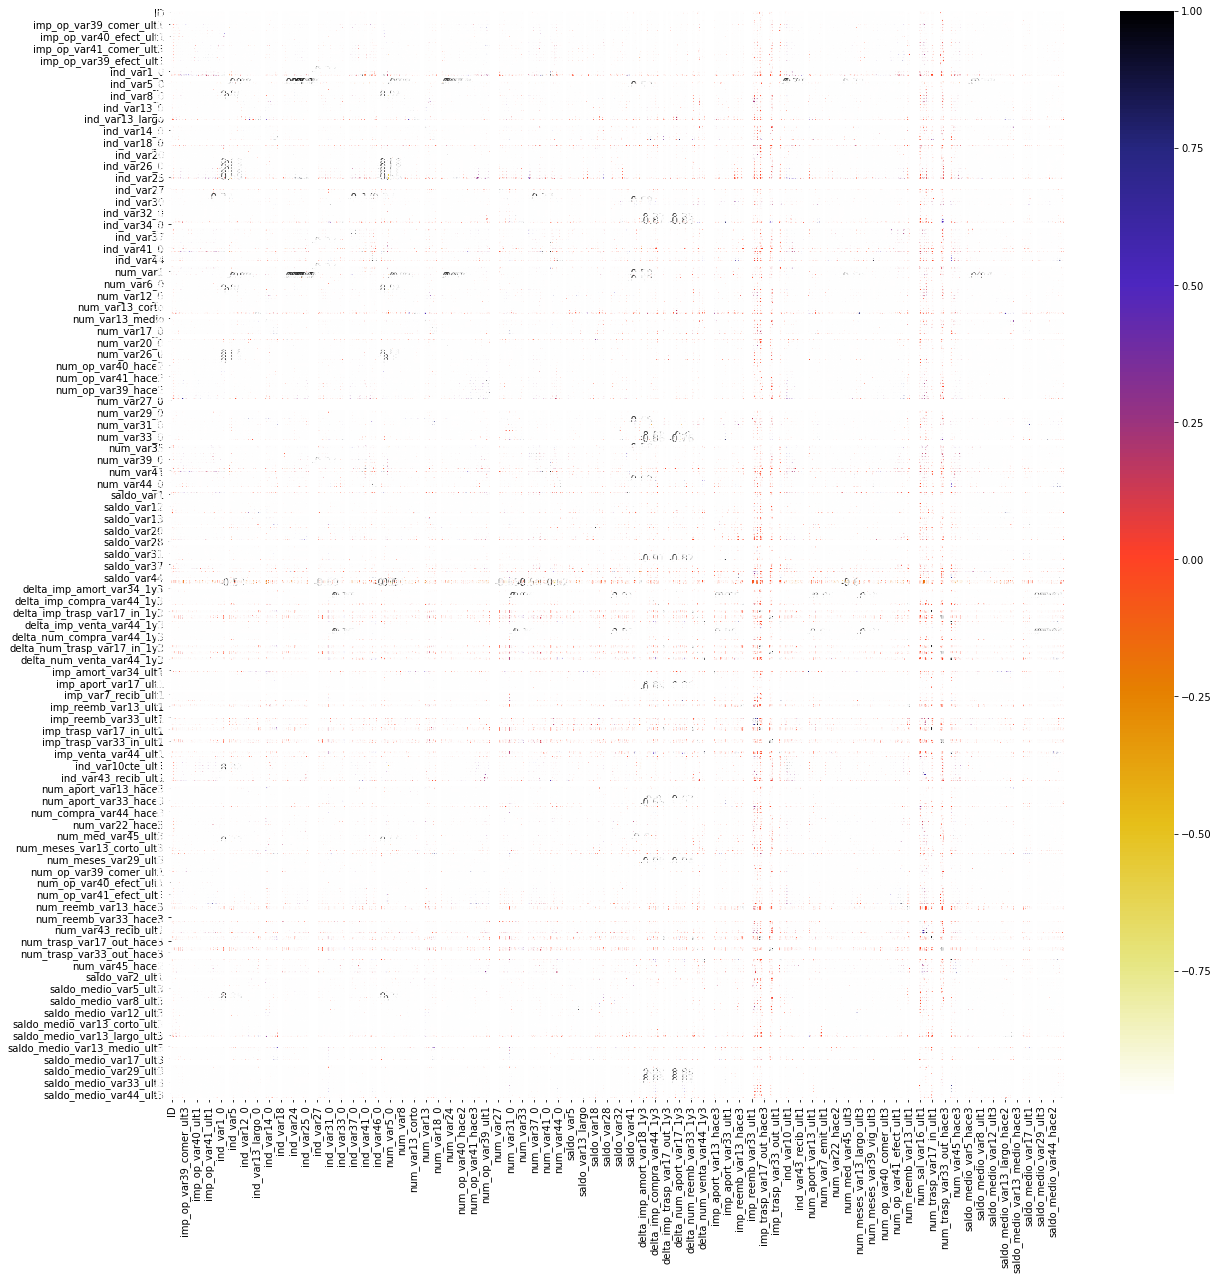

In [85]:
import seaborn as sns
#using Pearson Correlation
plt.figure(figsize = (20, 20))
cor = x_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [88]:
#using correlation function to see how many are highly correlated (> 90%)
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

156

In [89]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [90]:
x_train.drop(corr_features, axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15


- Correlation values close to 1.0 are known as highly correlated. And values close to 0.0 are known as less correlated.
- Let's take a threshold value as 0.8.
#### We will remove the correlated features but one thing to keep in mind that the correlated features should not be removed w.r.t dependent features. We will try to only remove the correlated features w.r.t independent features. If both the features are highly correlated i.e. 80% or 90% correlated with each other then we can drop one of these features. Because both the features are doing the same task. In correlation we only drop those features that re highly correlated.

- Threshold value need not be always 80%, sometimes it can be around 90%. The domain expert person can actually say the value of this threshold.

## 4. Information Gain (Mutual Information in Classification)

#### Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
- Mutual Information (MI) estimate mutual information for a discrete target variable.
- The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.
- A quantity called mmutual information measures the amount of information one can obtain from one random variable given other.
- This technique is applied to a __Classification__ problem.
- The mutual information between two random variables x and y can be stated formally as follows:  
__I(x ; y) = H(x) - H(x | y) where I(x ; y) is the mutual information for x and y, H(x) is the entropy for x and H(x | y) is the conditional entropy for x given y. The result has the units of bits.__

In [91]:
import pandas as pd

df = pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


- Here 'Wine' is the dependent feature (target variable).

In [92]:
#unique categories in target feature 'Wine'
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [95]:
#train test split to avoid overfitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels = ['Wine'], axis = 1),
                                                   df['Wine'], test_size = 0.3, random_state = 0)

In [96]:
x_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [97]:
#performing feature selection using mutual_info_classif library
from sklearn.feature_selection import mutual_info_classif

#determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.41794985, 0.30555629, 0.15267013, 0.27415718, 0.16970751,
       0.46938012, 0.71853714, 0.11379056, 0.26235507, 0.62106902,
       0.54708182, 0.54623168, 0.53617562])

- You will never get a negative value while using mutual_info_classif(). You will either get 0 or positive number within 1.
- If you are getting a very very high number, that particular feature is the best/most important feature or is the most dependent feature or you can say the dependency on the target is too much. 

In [98]:
#converting into series
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

Flavanoids              0.718537
Color.int               0.621069
Hue                     0.547082
OD                      0.546232
Proline                 0.536176
Phenols                 0.469380
Alcohol                 0.417950
Malic.acid              0.305556
Acl                     0.274157
Proanth                 0.262355
Mg                      0.169708
Ash                     0.152670
Nonflavanoid.phenols    0.113791
dtype: float64

- Flavanoids feature has the highest dependency on target feature i.e. Wine.

<AxesSubplot:>

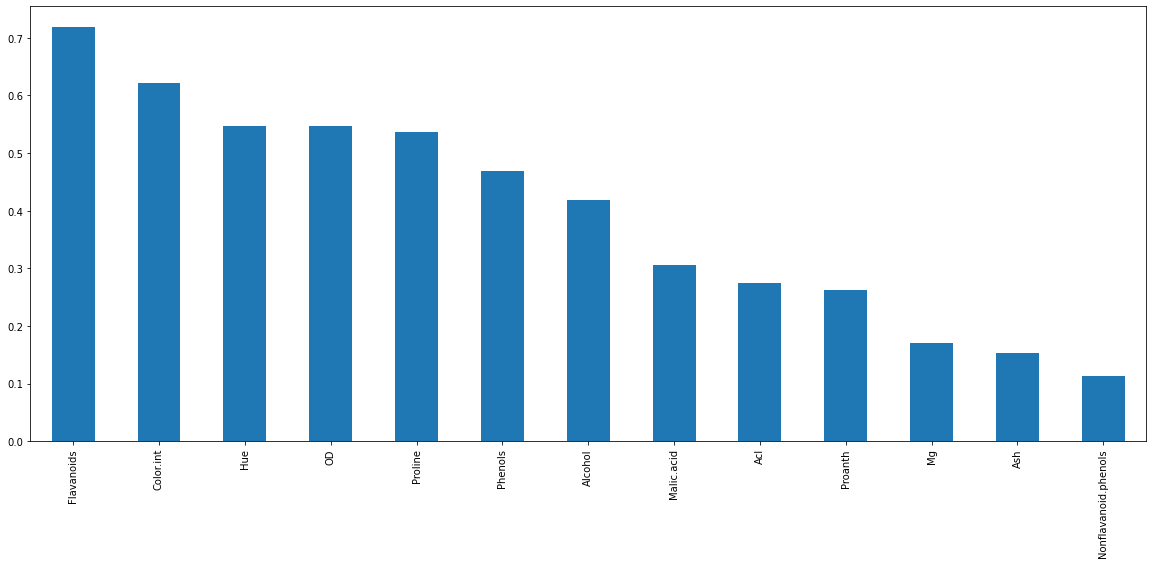

In [99]:
#plotting the ordered mutual_info values per feature
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20, 8))

- In this case we will pick top 10 features. This selection varies as per problem. Based on the analysis which features are needed for the problem statement, are selected.

In [100]:
from sklearn.feature_selection import SelectKBest

#selecting the top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k = 10)
sel_ten_cols.fit(x_train, y_train)
x_train.columns[sel_ten_cols.get_support()]

Index(['Alcohol', 'Malic.acid', 'Acl', 'Phenols', 'Flavanoids', 'Proanth',
       'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

__Difference Between Information Gain and Mutual Information Gain :__  
I(x ; y) = H(x) - H(x | y) and IG(S, a) = H(S) - H(S | a)  
As such, mutual information gain is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

- From here we will take the top 10 features and wherever the values are 0, we will drop those features.

## Information Gain (Mutual Information in Regression)
- This technique is used in case of continuous target variable.

In [101]:
import pandas as pd

housing_df = pd.read_csv('advanced_houseprice_train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [102]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Here 'SalePrice' is the continuous target variable.

In [103]:
#selecting all the numerical features
numeric_lst = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include = numeric_lst).columns)

In [104]:
df = housing_df[numerical_cols]
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [106]:
#dropping ID column. Its is just a unique identifier
df = df.drop('Id', axis = 1)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [107]:
#splitting train and test data to avoid overfitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis = 1), df['SalePrice'], test_size = 0.3,
                                                   random_state = 0)
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [108]:
x_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [109]:
from sklearn.feature_selection import mutual_info_regression
#determine the mutual information
mutual_info = mutual_info_regression(x_train.fillna(0), y_train)
mutual_info

array([0.25798314, 0.21068681, 0.16426725, 0.53281871, 0.10792841,
       0.34499269, 0.25221372, 0.10280377, 0.1648877 , 0.00386492,
       0.11522995, 0.38694222, 0.31184373, 0.22709237, 0.        ,
       0.48390249, 0.02147645, 0.00117274, 0.27269576, 0.07771085,
       0.04549621, 0.01643775, 0.19731997, 0.17273728, 0.26816446,
       0.37903812, 0.36992561, 0.06129169, 0.16362714, 0.00988709,
       0.00134753, 0.01503473, 0.00421196, 0.        , 0.        ,
       0.        ])

In [110]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

OverallQual      0.532819
GrLivArea        0.483902
TotalBsmtSF      0.386942
GarageCars       0.379038
GarageArea       0.369926
YearBuilt        0.344993
1stFlrSF         0.311844
FullBath         0.272696
GarageYrBlt      0.268164
MSSubClass       0.257983
YearRemodAdd     0.252214
2ndFlrSF         0.227092
LotFrontage      0.210687
TotRmsAbvGrd     0.197320
Fireplaces       0.172737
BsmtFinSF1       0.164888
LotArea          0.164267
OpenPorchSF      0.163627
BsmtUnfSF        0.115230
OverallCond      0.107928
MasVnrArea       0.102804
HalfBath         0.077711
WoodDeckSF       0.061292
BedroomAbvGr     0.045496
BsmtFullBath     0.021476
KitchenAbvGr     0.016438
ScreenPorch      0.015035
EnclosedPorch    0.009887
PoolArea         0.004212
BsmtFinSF2       0.003865
3SsnPorch        0.001348
BsmtHalfBath     0.001173
LowQualFinSF     0.000000
MoSold           0.000000
MiscVal          0.000000
YrSold           0.000000
dtype: float64

- So output variable 'SalePrice' is around 53% dependent on the feature 'OverallQual'.

<AxesSubplot:>

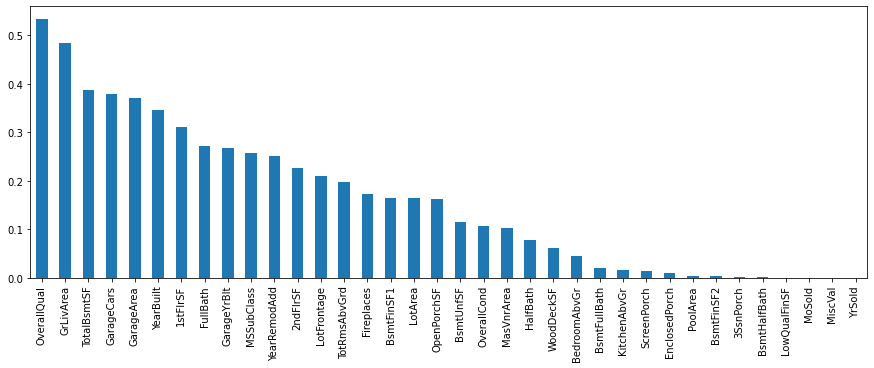

In [111]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (15, 5))

In [113]:
#selecting the top 20 percentile based on the percentile using SelectPercentile library
from sklearn.feature_selection import SelectPercentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile = 20)
selected_top_columns.fit(x_train.fillna(0), y_train)
x_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

- So these 7 features are the top 20 percentile. That means 80% of the entire population are having the dependency < 'GarageArea' feature.

## 5. Dropping constant features
- In this technique we will be removing the features which have constant features, which are actually not important for solving the problem statement.

In [52]:
import pandas as pd

#make dataframe of the given data
data = pd.DataFrame({"A" : [1, 2, 4, 1, 2, 4],
                    "B" : [4, 5, 6, 7, 8, 9],
                    "C" : [0, 0, 0, 0, 0, 0],
                    "D" : [1, 1, 1, 1, 1, 1]})
data

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


- Here C and D are having constant feature. So we will remove these columns using sklearn's class Variance Threshold.
#### Variance Threshold
- Feature selector that removes all low-variance features.
- This feature selection algorithm looks only at the features (x), not the desired outputs (y), and can thus be used for unsupervised learning.

In [53]:
# It removes the feature which is having 0 variance
from sklearn.feature_selection import VarianceThreshold
#initializing VarianceThreshold with threshold = 0
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [54]:
var_thres.get_support()

array([ True,  True, False, False])

- True means we do not have to remove the feature. So A and B will not be removed. They are known as Non-zero varinace features.
- False means we are going to remove the features. Here C and D are zero variance features and will be removed.

In [56]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [55]:
constant_columns = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]
print(len(constant_columns))

2


In [57]:
for feature in constant_columns:
    print(feature)

C
D


In [58]:
#dropping the constant columns
data.drop(constant_columns, axis = 1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


### Using the technique on bigger dataset

In [59]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [60]:
# creating dataframe and taking 10000 rows of it
df = pd.read_csv('santander_train.csv', nrows = 10000)
df.shape

(10000, 371)

In [61]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [62]:
x = df.drop(labels = ['TARGET'], axis = 1)
y = df['TARGET']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels = ['TARGET'], axis = 1), df['TARGET'], 
                                                    test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape

((7000, 370), (3000, 370))

In [64]:
#variance threshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(x_train)

VarianceThreshold(threshold=0)

In [65]:
#finding non constant features
sum(var_thres.get_support())

284

In [67]:
constant_columns = [column for column in x_train.columns if column not in x_train.columns[var_thres.get_support()]]
print(len(constant_columns))

86


In [68]:
#constant or zero variance columns
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [69]:
#removing constant features
x_train.drop(constant_columns, axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15


## 6. Fisher Score - Chisquare Test
- We compute chi-squared stats between each non-negative feature and class (target feature). Non-negative feature means features that do not have any -ve values.
- This score should be used to evaluate categorical variables in a classification task.
- This score can be used to select the n_features with the highest values for the test chi-squared statistic from x, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

In [114]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [115]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [117]:
#categorical feature : ['sex', 'embarked', 'alone', 'pclass', 'survived']
df = df[['sex', 'embarked', 'alone', 'pclass', 'survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


here 'survived' is the output feature.

In [120]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [121]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [122]:
df['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [123]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

- Before applying chi-square test we have to perform label encoding on each feature.

In [124]:
import numpy as np

#perform label encoding on sex column
df['sex'] = np.where(df['sex'] == 'male', 1, 0)
#perform label encoding on embarked column
ordinal_label = {k : i for i, k in enumerate(df['embarked'].unique(), 0)}
ordinal_label

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [125]:
#now we will assign these ordinal values to embarked column
df['embarked'] = df['embarked'].map(ordinal_label)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


- Now we have 0 in place of S, 1 in place of C, 2 in place of Q and 3 in place of NaN values.

In [126]:
#label encoding on 'alone' feature
df['alone'] = np.where(df['alone'] == True, 1, 0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [135]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['sex', 'embarked', 'alone', 'pclass']],
                                                   df['survived'], test_size = 0.3, random_state = 0)
x_train.head()

,sex,embarked,alone,pclass
857,1,0,1,1
52,0,1,0,1
386,1,0,0,3
124,1,0,0,1
578,0,1,0,3


In [136]:
#checking null values
x_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [137]:
#perform chi-square test
from sklearn.feature_selection import chi2

f_p_values = chi2(x_train, y_train)
f_p_values

(array([63.55447864, 11.83961845,  9.03328564, 21.61080949]),
 array([1.55992554e-15, 5.79837058e-04, 2.65107556e-03, 3.33964360e-06]))

#### chi-square returns 2 values. (1) Fscore (2) pvalue
- The first array value that we have above is the Fscore. This Fscore needs to be higher. The more the value of Fscore, more important the feature is.
- The second array value that we have above is the pvalue. Lesser the pvalue, more important the feature is.

In [138]:
#converting into Series
p_values = pd.Series(f_p_values[1])
p_values.index = x_train.columns
p_values

sex         1.559926e-15
embarked    5.798371e-04
alone       2.651076e-03
pclass      3.339644e-06
dtype: float64

In [139]:
p_values.sort_index(ascending = False)

sex         1.559926e-15
pclass      3.339644e-06
embarked    5.798371e-04
alone       2.651076e-03
dtype: float64

- Hence 'sex' feature is the most important feature when compared to the output feature 'survived' as the pvalue is very less of 'sex'. 

# Boston Housing Data

__Dependent Variable: MEDV:__ Median value of owner-occupied homes in 1000's of dollars  

__Explanatory Variables:__  

__CRIM:__ per capita crime rate by town  

__ZN:__ proportion of residential land zoned for lots over 25,000 sq.ft.  

__INDUS:__ proportion of non-retail business acres per town  

__CHAS:__ Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  

__NOX:__ nitric oxides concentration (parts per 10 million)  

__RM:__ average number of rooms per dwelling  

__AGE:__ proportion of owner-occupied units built prior to 1940  

__DIS:__ weighted distances to five Boston employment centres  

__RAD:__ index of accessibility to radial highways  

__TAX:__ full-value property-tax rate per 10,000 dollars  

__PTRATIO:__ pupil-teacher ratio by town  

__B:__ 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town  

__LSTAT:__ lower status of the population

In [26]:
from sklearn.datasets import load_boston

In [27]:
boston_data = load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [28]:
import pandas as pd

In [29]:
boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
boston['MEDV'] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
boston['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

- The values under feature 'RAD' are basically labels than actual numerical values. The variable like this is actually coded as categorical variable.

In [31]:
#dummy variables
dummies = pd.get_dummies(boston.RAD)
boston = boston.drop(columns = 'RAD').merge(dummies, left_index = True, right_index = True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,...,22.4,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,...,20.6,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,...,23.9,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,...,22.0,1,0,0,0,0,0,0,0,0


In [32]:
x = boston.drop(columns = 'MEDV')
y = boston.MEDV

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from math import sqrt

cv = KFold(n_splits = 10, shuffle = False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = 10))
y_pred = cross_val_predict(classifier_pipeline, x, y, cv = cv)
print('RMSE : ' + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print('R_squared : ' + str(round(r2_score(y,y_pred),2)))

RMSE : 6.51
R_squared : 0.5


## Filter Features by Variance

In [34]:
boston.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
1.0            0.038039
2.0            0.045271
3.0            0.069597
4.0            0.170469
5.0            0.175968
6.0            0.048840
7.0            0.032532
8.0            0.045271
24.0           0.193198
dtype: float64

- There are some features which have very low variance. That means they really don't change much in their values. Low variance close to zero means that the values of the features are pretty much always the same. So it is unlikely that they are good predictors because unless all of the output variables are the same. Then it doesn't really kind of represent the changes whereas ones that have a higher variance can often be explaining what's going on in the data. So we will drop the features having very low variance. 

In [35]:
x = x.drop(columns = ['NOX', 'CHAS'])

- In case of radial variables that we have added, all those have quite low variance as well except for 24. So that might be actually relevant but all the other radial variables doesn't really have anything and so one thing we can do is drop those but we can't actually just delete some levels and not others because that just doesn't really make sense. So we are going to leave those.

In [36]:
y_pred = cross_val_predict(classifier_pipeline, x, y, cv = cv)
print('RMSE : ' + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print('R_squared: ' + str(round(r2_score(y,y_pred), 2)))

RMSE : 6.28
R_squared: 0.53


## Filter Features by Correlation

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

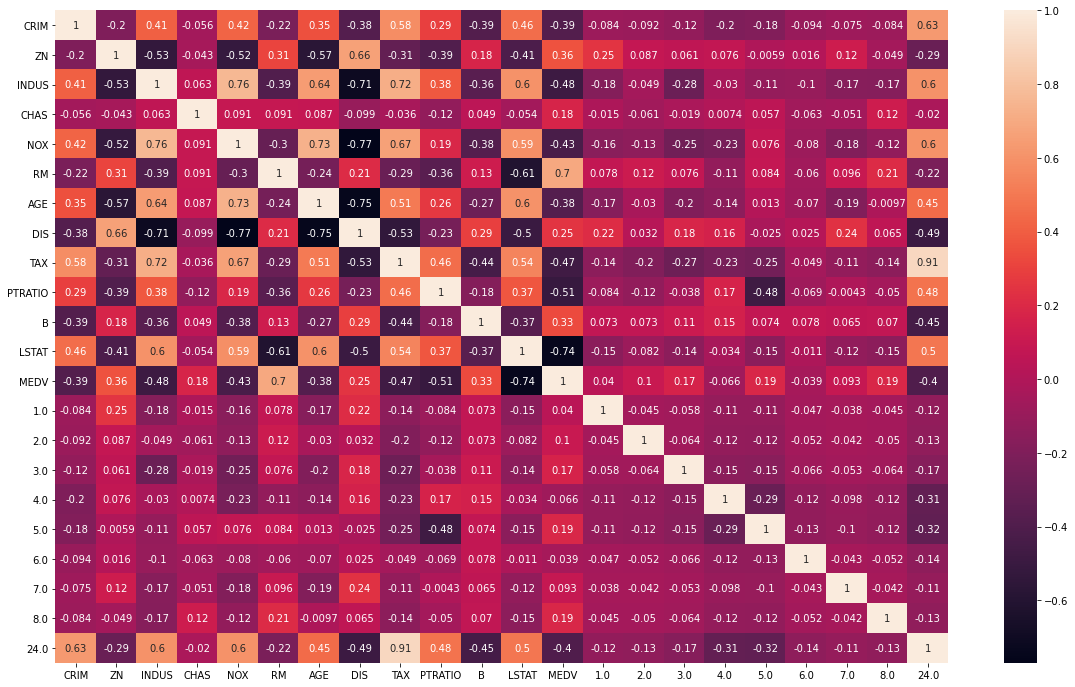

In [43]:
plt.figure(figsize = (20, 12))
sns.heatmap(boston.corr(), annot = True)

In [44]:
#correlation of features with the target variable
abs(boston.corr()['MEDV'])  #absolute value has been taken, hence all values are positive

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
1.0        0.040453
2.0        0.104444
3.0        0.167352
4.0        0.065711
5.0        0.187356
6.0        0.039411
7.0        0.092802
8.0        0.190053
24.0       0.396297
Name: MEDV, dtype: float64

In [45]:
#features having correlation > 0.5
abs(boston.corr()["MEDV"][abs(boston.corr()["MEDV"]) > 0.5].drop('MEDV')).index.tolist()

['RM', 'PTRATIO', 'LSTAT']

In [47]:
vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for val in vals:
    features = abs(boston.corr()["MEDV"][abs(boston.corr()["MEDV"]) > val].drop('MEDV')).index.tolist()
    
    x = boston.drop(columns = 'MEDV')
    x = x[features]
    print(features)
    
    y_pred = cross_val_predict(classifier_pipeline, x, y, cv = cv)
    print('RMSE : ' + str(round(sqrt(mean_squared_error(y, y_pred)), 2)))
    print('R_squared : ' + str(round(r2_score(y, y_pred), 2)))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 2.0, 3.0, 5.0, 8.0, 24.0]
RMSE : 6.47
R_squared : 0.5
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
RMSE : 5.27
R_squared : 0.67
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
RMSE : 5.42
R_squared : 0.65
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
RMSE : 4.89
R_squared : 0.72
['RM', 'PTRATIO', 'LSTAT']
RMSE : 4.73
R_squared : 0.74
['RM', 'LSTAT']
RMSE : 4.8
R_squared : 0.73
['LSTAT']
RMSE : 5.7
R_squared : 0.61
